## Pandas

    1. Series
    2. Pandas
    3. Pannels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.DataFrame({
    'height': np.random.randint(120, 160, 10),
    'weight': np.random.randint(50, 120, 10),
    'salary': np.random.randint(30, 80, 10),
    'country': np.random.choice(['India', 'USA', 'AUS'], 10, replace=True)
}, index=[ chr(65+i) for i in range(10)])

In [15]:
df

,height,weight,salary,country
A,130,101,42,India
B,154,67,45,USA
C,128,63,57,India
D,123,82,59,AUS
E,123,118,70,USA
F,151,110,44,AUS
G,158,98,60,USA
H,154,61,54,AUS
I,142,106,51,India
J,140,55,34,AUS


### how to access data 

In [16]:
df['height'] # Series 1D

A    130
B    154
C    128
D    123
E    123
F    151
G    158
H    154
I    142
J    140
Name: height, dtype: int32

In [17]:
df[ [ 'height' ] ] # DataFrame 2-D

,height
A,130
B,154
C,128
D,123
E,123
F,151
G,158
H,154
I,142
J,140


In [19]:
temp = df[ [ 'height', 'weight' ] ]

In [20]:
temp.head()

,height,weight
A,130,101
B,154,67
C,128,63
D,123,82
E,123,118


In [21]:
df.head()

,height,weight,salary,country
A,130,101,42,India
B,154,67,45,USA
C,128,63,57,India
D,123,82,59,AUS
E,123,118,70,USA


loc, iloc

at, iat

    loc, at -> label indexes
    iloc, iat -> default indexes
    
loc, iloc, at, iat

    loc, iloc -> to multiple values
    
    at, iat -> to select single values

#### by label indexes 

    loc[row_labels, column_labels] -> to select multiple rows
    
    at[row_label, column_label] -> to access a single fast

In [22]:
df

,height,weight,salary,country
A,130,101,42,India
B,154,67,45,USA
C,128,63,57,India
D,123,82,59,AUS
E,123,118,70,USA
F,151,110,44,AUS
G,158,98,60,USA
H,154,61,54,AUS
I,142,106,51,India
J,140,55,34,AUS


In [25]:
%%timeit
df.loc['F', 'weight']

9.36 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [23]:
df.loc['F', 'weight']

110

In [24]:
df.at['F', 'weight']

110

In [26]:
%%timeit
df.at['F', 'weight']

4.75 µs ± 352 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [27]:
df.loc['F', ]

height     151
weight     110
salary      44
country    AUS
Name: F, dtype: object

In [29]:
#df.iat['F', ]

In [30]:
df

,height,weight,salary,country
A,130,101,42,India
B,154,67,45,USA
C,128,63,57,India
D,123,82,59,AUS
E,123,118,70,USA
F,151,110,44,AUS
G,158,98,60,USA
H,154,61,54,AUS
I,142,106,51,India
J,140,55,34,AUS


In [31]:
df.loc[::2, ]

,height,weight,salary,country
A,130,101,42,India
C,128,63,57,India
E,123,118,70,USA
G,158,98,60,USA
I,142,106,51,India


In [32]:
df.loc[:, ::2]

,height,salary
A,130,42
B,154,45
C,128,57
D,123,59
E,123,70
F,151,44
G,158,60
H,154,54
I,142,51
J,140,34


In [34]:
df.loc[::2, ::2]

,height,salary
A,130,42
C,128,57
E,123,70
G,158,60
I,142,51


In [36]:
df.loc[ ['I', 'C', 'A', 'D'], ]

,height,weight,salary,country
I,142,106,51,India
C,128,63,57,India
A,130,101,42,India
D,123,82,59,AUS


In [37]:
df.loc[ ['I', 'C', 'A', 'D'], ['height', 'weight'] ]

,height,weight
I,142,106
C,128,63
A,130,101
D,123,82


In [38]:
df

,height,weight,salary,country
A,130,101,42,India
B,154,67,45,USA
C,128,63,57,India
D,123,82,59,AUS
E,123,118,70,USA
F,151,110,44,AUS
G,158,98,60,USA
H,154,61,54,AUS
I,142,106,51,India
J,140,55,34,AUS


In [40]:
df.loc[['F', 'J'], ['weight', 'salary']] = [ [ 100, 50], [60, 40] ] 

In [42]:
df

,height,weight,salary,country
A,130,101,42,India
B,154,67,45,USA
C,128,63,57,India
D,123,82,59,AUS
E,123,118,70,USA
F,151,100,50,AUS
G,158,98,60,USA
H,154,61,54,AUS
I,142,106,51,India
J,140,60,40,AUS


In [47]:
df['height'] = df['height'].astype(float)

In [48]:
df

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,0.0,63,57,India
D,123.0,82,59,AUS
E,123.0,118,70,USA
F,151.0,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
I,142.0,106,51,India
J,140.0,60,40,AUS


In [75]:
df.at['C', 'height'] = np.nan

In [50]:
df

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,NaN,63,57,India
D,123.0,82,59,AUS
E,123.0,118,70,USA
F,151.0,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
I,142.0,106,51,India
J,140.0,60,40,AUS


In [52]:
df.isna().sum()

height     1
weight     0
salary     0
country    0
dtype: int64

In [55]:
df.isna().sum(axis=1)

A    0
B    0
C    1
D    0
E    0
F    0
G    0
H    0
I    0
J    0
dtype: int64

In [74]:
df.loc[ ['F', 'J'], 'height'] = np.nan

In [59]:
df

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,NaN,63,57,India
D,123.0,82,59,AUS
E,123.0,118,70,USA
F,NaN,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
I,142.0,106,51,India
J,NaN,60,40,AUS


In [60]:
df.isna().sum(axis=1)

A    0
B    0
C    1
D    0
E    0
F    1
G    0
H    0
I    0
J    1
dtype: int64

In [61]:
df.isna().sum(axis=0)

height     3
weight     0
salary     0
country    0
dtype: int64

In [62]:
df

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,NaN,63,57,India
D,123.0,82,59,AUS
E,123.0,118,70,USA
F,NaN,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
I,142.0,106,51,India
J,NaN,60,40,AUS


In [67]:
df[df['height'] > 150] # Condinal Indexing

,height,weight,salary,country
B,154.0,67,45,USA
G,158.0,98,60,USA
H,154.0,61,54,AUS


In [69]:
df['height'][df['height'] > 150]

B    154.0
G    158.0
H    154.0
Name: height, dtype: float64

In [70]:
df.head()

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,NaN,63,57,India
D,123.0,82,59,AUS
E,123.0,118,70,USA


In [71]:
df['height'][df['height'].isna()] = df['height'].median()

<ipython-input-71-93c714fecf42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'][df['height'].isna()] = df['height'].median()


In [78]:
ix = df['height'][df['height'].isna()].index 

In [85]:
#df['height'] # a view / copy of original height column

In [83]:
df.loc[ix, 'height'] = df['height'].median()

In [72]:
df

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,142.0,63,57,India
D,123.0,82,59,AUS
E,123.0,118,70,USA
F,142.0,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
I,142.0,106,51,India
J,142.0,60,40,AUS


In [86]:
d = np.random.randint(100, 200, 80)
np.median(d)

155.5

In [93]:
d1 = np.append(d, np.random.randint(60, 240, 20))

In [94]:
np.median(d1)

158.0

In [95]:
df1 = df.copy()

In [96]:
df1.head()

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,142.0,63,57,India
D,123.0,82,59,AUS
E,123.0,118,70,USA


In [97]:
df.head()

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,142.0,63,57,India
D,123.0,82,59,AUS
E,123.0,118,70,USA


### iloc, iat

In [99]:
df

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,142.0,63,57,India
D,123.0,82,59,AUS
E,123.0,118,70,USA
F,142.0,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
I,142.0,106,51,India
J,142.0,60,40,AUS


In [112]:
%%timeit
df.loc['F', 'weight'] # df.index

8.23 µs ± 272 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [113]:
%%timeit
df.iloc[5, 1] # iloc -> df -> numpy -> iloc

9.18 µs ± 899 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [107]:
%%timeit
df.at['F', 'weight']

6.75 µs ± 475 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [109]:
%%timeit
df.iat[5, 1]

5.82 µs ± 204 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [114]:
df

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,142.0,63,57,India
D,123.0,82,59,AUS
E,123.0,118,70,USA
F,142.0,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
I,142.0,106,51,India
J,142.0,60,40,AUS


In [115]:
df.iloc[::2, ::2]

,height,salary
A,130.0,42
C,142.0,57
E,123.0,70
G,158.0,60
I,142.0,51


In [116]:
df.iloc[1:7:2, 1:4:2]

,weight,country
B,67,USA
D,82,AUS
F,100,AUS


In [117]:
df.iloc[ [0, 3, 1], [2, 0]]

,salary,height
A,42,130.0
D,59,123.0
B,45,154.0


In [118]:
df

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,142.0,63,57,India
D,123.0,82,59,AUS
E,123.0,118,70,USA
F,142.0,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
I,142.0,106,51,India
J,142.0,60,40,AUS


In [119]:
df[df['weight'] > 100]

,height,weight,salary,country
A,130.0,101,42,India
E,123.0,118,70,USA
I,142.0,106,51,India


In [120]:
df[ (df['weight'] > 100) & (df['salary'] > 50) ]

,height,weight,salary,country
E,123.0,118,70,USA
I,142.0,106,51,India


In [121]:
df[ df['country'] == 'India']

,height,weight,salary,country
A,130.0,101,42,India
C,142.0,63,57,India
I,142.0,106,51,India


In [122]:
df[ df['country'].isin( ['India', 'USA'] ) ]

,height,weight,salary,country
A,130.0,101,42,India
B,154.0,67,45,USA
C,142.0,63,57,India
E,123.0,118,70,USA
G,158.0,98,60,USA
I,142.0,106,51,India


In [126]:
df.loc[::4, 'height'] = np.nan

In [127]:
df

,height,weight,salary,country
A,NaN,101,42,India
B,154.0,67,45,USA
C,142.0,63,57,India
D,123.0,82,59,AUS
E,NaN,118,70,USA
F,142.0,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
I,NaN,106,51,India
J,142.0,60,40,AUS


In [129]:
df[df['height'].isna()]

,height,weight,salary,country
A,NaN,101,42,India
E,NaN,118,70,USA
I,NaN,106,51,India


In [131]:
df.dropna()

,height,weight,salary,country
B,154.0,67,45,USA
C,142.0,63,57,India
D,123.0,82,59,AUS
F,142.0,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
J,142.0,60,40,AUS


In [132]:
df.dropna(axis=1)

,weight,salary,country
A,101,42,India
B,67,45,USA
C,63,57,India
D,82,59,AUS
E,118,70,USA
F,100,50,AUS
G,98,60,USA
H,61,54,AUS
I,106,51,India
J,60,40,AUS


In [143]:
#df.where(df['height'] > 120)

In [139]:
df.query("height > 120")

,height,weight,salary,country
B,154.0,67,45,USA
C,142.0,63,57,India
D,123.0,82,59,AUS
F,142.0,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
J,142.0,60,40,AUS


In [142]:
df.query("height > 120 and salary > 55 and country == 'India'")

,height,weight,salary,country
C,142.0,63,57,India


In [144]:
df[(df['height']> 120) & (df['salary'] > 55) & (df['country'] == 'India')]

,height,weight,salary,country
C,142.0,63,57,India


In [145]:
d = np.random.randint(500, 1000, 90)
d.mean()

798.0888888888888

In [146]:
np.median(d)

821.0

In [147]:
d1 = np.append(d, np.zeros(10))
d1.mean()

718.28

In [148]:
np.median(d1)

784.5

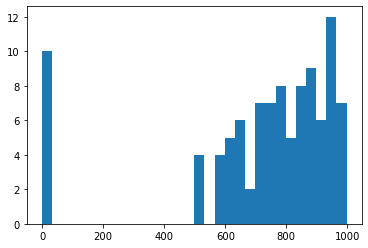

In [151]:
plt.hist(d1, bins=30)
plt.show()

### To Drop Columns

In [156]:
df.drop(['height', 'weight'], axis=1)#, inpalce=True)

,salary,country
A,42,India
B,45,USA
C,57,India
D,59,AUS
E,70,USA
F,50,AUS
G,60,USA
H,54,AUS
I,51,India
J,40,AUS


In [163]:
s = pd.Series(np.arange(5), index=['A', 'C', 'F', 'I', 'D'])
s

A    0
C    1
F    2
I    3
D    4
dtype: int32

In [164]:
df

,height,weight,salary,country,s
A,NaN,101,42,India,NaN
B,154.0,67,45,USA,NaN
C,142.0,63,57,India,NaN
D,123.0,82,59,AUS,NaN
E,NaN,118,70,USA,NaN
F,142.0,100,50,AUS,NaN
G,158.0,98,60,USA,NaN
H,154.0,61,54,AUS,NaN
I,NaN,106,51,India,NaN
J,142.0,60,40,AUS,NaN


In [166]:
df['s'] = s # index label based

In [168]:
df.head()

,height,weight,salary,country,s
A,NaN,101,42,India,0.0
B,154.0,67,45,USA,NaN
C,142.0,63,57,India,1.0
D,123.0,82,59,AUS,4.0
E,NaN,118,70,USA,NaN


In [169]:
df.drop('s', axis=1, inplace=True)

In [170]:
df

,height,weight,salary,country
A,NaN,101,42,India
B,154.0,67,45,USA
C,142.0,63,57,India
D,123.0,82,59,AUS
E,NaN,118,70,USA
F,142.0,100,50,AUS
G,158.0,98,60,USA
H,154.0,61,54,AUS
I,NaN,106,51,India
J,142.0,60,40,AUS


In [171]:
df['above_50'] = df['salary'] >= 50

In [172]:
df

,height,weight,salary,country,above_50
A,NaN,101,42,India,False
B,154.0,67,45,USA,False
C,142.0,63,57,India,True
D,123.0,82,59,AUS,True
E,NaN,118,70,USA,True
F,142.0,100,50,AUS,True
G,158.0,98,60,USA,True
H,154.0,61,54,AUS,True
I,NaN,106,51,India,True
J,142.0,60,40,AUS,False


In [173]:
df[df['above_50']]

,height,weight,salary,country,above_50
C,142.0,63,57,India,True
D,123.0,82,59,AUS,True
E,NaN,118,70,USA,True
F,142.0,100,50,AUS,True
G,158.0,98,60,USA,True
H,154.0,61,54,AUS,True
I,NaN,106,51,India,True


In [176]:
df['height'].fillna(df['height'].median(), inplace=True)

In [177]:
df

,height,weight,salary,country,above_50
A,142.0,101,42,India,False
B,154.0,67,45,USA,False
C,142.0,63,57,India,True
D,123.0,82,59,AUS,True
E,142.0,118,70,USA,True
F,142.0,100,50,AUS,True
G,158.0,98,60,USA,True
H,154.0,61,54,AUS,True
I,142.0,106,51,India,True
J,142.0,60,40,AUS,False


#### Feature Engineering

In [180]:
df['hw'] = df['height']+df['weight']

In [181]:
df

,height,weight,salary,country,above_50,hw
A,142.0,101,42,India,False,243.0
B,154.0,67,45,USA,False,221.0
C,142.0,63,57,India,True,205.0
D,123.0,82,59,AUS,True,205.0
E,142.0,118,70,USA,True,260.0
F,142.0,100,50,AUS,True,242.0
G,158.0,98,60,USA,True,256.0
H,154.0,61,54,AUS,True,215.0
I,142.0,106,51,India,True,248.0
J,142.0,60,40,AUS,False,202.0


In [185]:
df1 = df.assign(
    bmi = df['weight'] / (df['height']/100)**2,
    rupees = df['salary'] * 1000,
    )

In [186]:
df.head()

,height,weight,salary,country,above_50,hw
A,142.0,101,42,India,False,243.0
B,154.0,67,45,USA,False,221.0
C,142.0,63,57,India,True,205.0
D,123.0,82,59,AUS,True,205.0
E,142.0,118,70,USA,True,260.0


In [187]:
df1.head()

,height,weight,salary,country,above_50,hw,bmi,rupees
A,142.0,101,42,India,False,243.0,50.089268,42000
B,154.0,67,45,USA,False,221.0,28.250970,45000
C,142.0,63,57,India,True,205.0,31.243801,57000
D,123.0,82,59,AUS,True,205.0,54.200542,59000
E,142.0,118,70,USA,True,260.0,58.520135,70000


In [194]:
df1 = df.assign(
    bmi = df['weight'] / (df['height']/100)**2,
    rupees = df['salary'] * 1000,
    )

In [195]:
df1.head()

,height,weight,salary,country,above_50,hw,bmi,rupees
A,142.0,101,42,India,False,243.0,50.089268,42000
B,154.0,67,45,USA,False,221.0,28.250970,45000
C,142.0,63,57,India,True,205.0,31.243801,57000
D,123.0,82,59,AUS,True,205.0,54.200542,59000
E,142.0,118,70,USA,True,260.0,58.520135,70000


#### Continue 

In [196]:
df2 = df1[::2]

In [197]:
df3 = df1[1::2]

In [198]:
df2

,height,weight,salary,country,above_50,hw,bmi,rupees
A,142.0,101,42,India,False,243.0,50.089268,42000
C,142.0,63,57,India,True,205.0,31.243801,57000
E,142.0,118,70,USA,True,260.0,58.520135,70000
G,158.0,98,60,USA,True,256.0,39.256529,60000
I,142.0,106,51,India,True,248.0,52.568935,51000


In [200]:
df3

,height,weight,salary,country,above_50,hw,bmi,rupees
B,154.0,67,45,USA,False,221.0,28.250970,45000
D,123.0,82,59,AUS,True,205.0,54.200542,59000
F,142.0,100,50,AUS,True,242.0,49.593335,50000
H,154.0,61,54,AUS,True,215.0,25.721032,54000
J,142.0,60,40,AUS,False,202.0,29.756001,40000


In [202]:
ndf = pd.concat([ df2, df3 ])

In [203]:
ndf

,height,weight,salary,country,above_50,hw,bmi,rupees
A,142.0,101,42,India,False,243.0,50.089268,42000
C,142.0,63,57,India,True,205.0,31.243801,57000
E,142.0,118,70,USA,True,260.0,58.520135,70000
G,158.0,98,60,USA,True,256.0,39.256529,60000
I,142.0,106,51,India,True,248.0,52.568935,51000
B,154.0,67,45,USA,False,221.0,28.250970,45000
D,123.0,82,59,AUS,True,205.0,54.200542,59000
F,142.0,100,50,AUS,True,242.0,49.593335,50000
H,154.0,61,54,AUS,True,215.0,25.721032,54000
J,142.0,60,40,AUS,False,202.0,29.756001,40000


In [205]:
df.head()

,height,weight,salary,country,above_50,hw
A,142.0,101,42,India,False,243.0
B,154.0,67,45,USA,False,221.0
C,142.0,63,57,India,True,205.0
D,123.0,82,59,AUS,True,205.0
E,142.0,118,70,USA,True,260.0


In [209]:
df[df.eval("weight > 100 & height > 120")]

,height,weight,salary,country,above_50,hw
A,142.0,101,42,India,False,243.0
E,142.0,118,70,USA,True,260.0
I,142.0,106,51,India,True,248.0


In [220]:
w_c = 90
h_c = 140
df.eval(f"owoh = weight > {w_c} & height > {h_c}", inplace=True)
df

,height,weight,salary,country,above_50,hw,owoh
A,142.0,101,42,India,False,243.0,True
B,154.0,67,45,USA,False,221.0,False
C,142.0,63,57,India,True,205.0,False
D,123.0,82,59,AUS,True,205.0,False
E,142.0,118,70,USA,True,260.0,True
F,142.0,100,50,AUS,True,242.0,True
G,158.0,98,60,USA,True,256.0,True
H,154.0,61,54,AUS,True,215.0,False
I,142.0,106,51,India,True,248.0,True
J,142.0,60,40,AUS,False,202.0,False


In [216]:
w_c = 90
h_c = 140
df.eval("owoh = weight > @w_c & height > @h_c", inplace=True)
# annotation

In [218]:
df.head()

,height,weight,salary,country,above_50,hw,owoh
A,142.0,101,42,India,False,243.0,True
B,154.0,67,45,USA,False,221.0,False
C,142.0,63,57,India,True,205.0,False
D,123.0,82,59,AUS,True,205.0,False
E,142.0,118,70,USA,True,260.0,True


In [221]:
df.describe()

,height,weight,salary,hw
count,10.000000,10.000000,10.000000,10.000000
mean,144.100000,85.600000,52.800000,229.700000
std,9.780366,21.588063,9.174845,22.489751
min,123.000000,60.000000,40.000000,202.000000
25%,142.000000,64.000000,46.250000,207.500000
50%,142.000000,90.000000,52.500000,231.500000
75%,151.000000,100.750000,58.500000,246.750000
max,158.000000,118.000000,70.000000,260.000000


Transformation & Aggregation

    apply
    map
    groupby
    aggregate, agg
    mean, median, ...
    merge, join -> inner, outer, left, right
    Pivot tables -> long to wide, wide to long
    
    
    